In [14]:
import data
import numpy as np
import matplotlib.pyplot as plt

Train = data.TrainData() # or TestData
x, y = Train[0:1] # get first l images

Test = data.TestData()
xt, yt = Test[0:1]


In [15]:
def myPlot(A):#input k*28*28 image
    #for i in range(1):
     #   plt.figure()
      #  aimage = A[i]
       # aimage = np.array(aimage, dtype='float')
        #aimage = aimage.reshape((28, 28))
      #  plt.imshow(aimage, cmap='gray')
    #plt.show()
    
    fig=plt.figure()
    columns = 1
    rows = 1
    for i in range(columns*rows):
        aimage = A[i]
        aimage = np.array(aimage, dtype='float')
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(aimage, cmap='gray')
    plt.show()

In [16]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [4]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


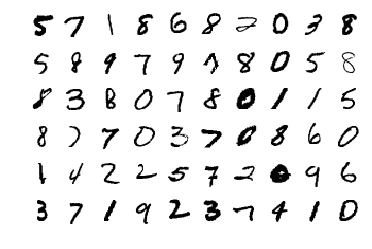

In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [72]:
input_size = 784
#hidden_sizes = [128, 64]
hidden_sizes = [128]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], output_size),
                      #nn.ReLU(),
                      #nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax()
)


In [88]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)
print(loss.item())

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0057,  0.0057,  0.0057,  ...,  0.0057,  0.0057,  0.0057],
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [ 0.0067,  0.0067,  0.0067,  ...,  0.0067,  0.0067,  0.0067],
        ...,
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023]])
2.3812830448150635


In [89]:
# Three layer Sigmoid activation
from time import time

optimizer = optim.SGD(model.parameters(), lr = 0.03, momentum = 0.9)
time0 = time()
epochs = 15
loss_epoch = []
loss_iteration = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)#Flatten
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_iteration.append(loss.item())
        running_loss += loss.item()
    else:
        loss_epoch.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
print("\nTraining Time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 0.3257774852875517
Epoch 1 - Training loss: 0.16677885087254618
Epoch 2 - Training loss: 0.13615526454443774
Epoch 3 - Training loss: 0.114460509148057
Epoch 4 - Training loss: 0.09945682492350409
Epoch 5 - Training loss: 0.09018054552453715
Epoch 6 - Training loss: 0.0810439624733774
Epoch 7 - Training loss: 0.07559426022824575
Epoch 8 - Training loss: 0.06511330400776766
Epoch 9 - Training loss: 0.06306086323680236
Epoch 10 - Training loss: 0.059096376606780014
Epoch 11 - Training loss: 0.05235003524145652
Epoch 12 - Training loss: 0.05046757846018364
Epoch 13 - Training loss: 0.04543635169034084
Epoch 14 - Training loss: 0.04283053629098585

Training Time (in minutes) = 6.898388806978861


In [53]:
def lossPlot(theLoss, name):
    plt.figure()
    epo = np.linspace(0, len(theLoss), len(theLoss))
    plt.plot(epo, theLoss)
    plt.xlabel("Number of " + name)
    plt.ylabel("Training loss")
    plt.title("Training loss with " + name)
    plt.show()

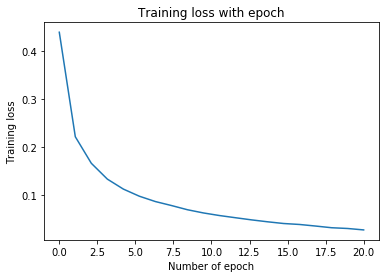

In [54]:
lossPlot(loss_epoch, "epoch")

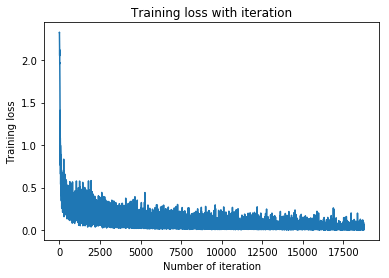

In [55]:
lossPlot(loss_iteration, "iteration")

In [91]:
# A view_classify function from Github
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 5


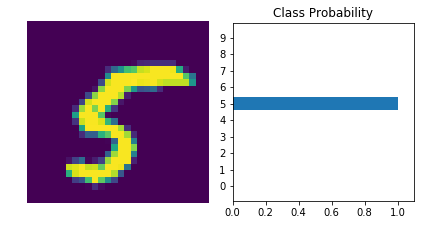

In [129]:
# testing
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [130]:
# Over all testing accuracy
def classify(img):
    with torch.no_grad():
        logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    return probab.index(max(probab))

In [141]:
sum_loss = 0
count = 0
correct = 0
for images, labels in valloader:
    for i in range(len(images)):
        img = images[i].view(1, 784)
        #pro = classify(img)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        count +=1
        if labels[i] == probab.index(max(probab)):
            correct += 1
print(correct / count) 

0.97


In [144]:
# four layer

input_size = 784
hidden_sizes = [128, 64]
#hidden_sizes = [128]
output_size = 10

model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [145]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model2.parameters(), lr = 0.03, momentum = 0.9)
time0 = time()
epochs = 15
loss_epoch_4 = []
loss_iteration_4 = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)#Flatten
        optimizer.zero_grad()
        output = model2(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_iteration_4.append(loss.item())
        running_loss += loss.item()
    else:
        loss_epoch_4.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
print("\nTraining Time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 0.8373181296786519
Epoch 1 - Training loss: 0.26945853438268086
Epoch 2 - Training loss: 0.1903723349639856
Epoch 3 - Training loss: 0.14902359313730681
Epoch 4 - Training loss: 0.12291066879346998
Epoch 5 - Training loss: 0.10492675061246305
Epoch 6 - Training loss: 0.09165144652557145
Epoch 7 - Training loss: 0.0802358509501073
Epoch 8 - Training loss: 0.07121480372337215
Epoch 9 - Training loss: 0.06411324690472382
Epoch 10 - Training loss: 0.05757362471430747
Epoch 11 - Training loss: 0.050698911894047294
Epoch 12 - Training loss: 0.04666024342830628
Epoch 13 - Training loss: 0.04243368131251557
Epoch 14 - Training loss: 0.03874991390445053

Training Time (in minutes) = 6.959117142359416


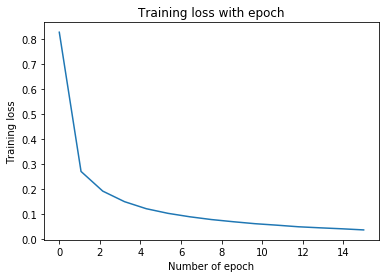

In [63]:
lossPlot(loss_epoch_4, "epoch")

In [146]:
count = 0
correct = 0
for images, labels in valloader:
    for i in range(len(images)):
        img = images[i].view(1, 784)
        #pro = classify(img)
        with torch.no_grad():
            logps = model2(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        count +=1
        if labels[i] == probab.index(max(probab)):
            correct += 1
print(correct / count) 

0.9773


In [148]:
# five layer

input_size = 784
hidden_sizes = [128, 64, 32]
#hidden_sizes = [128]
output_size = 10

model3 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))
print(model3)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=32, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [149]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model3.parameters(), lr = 0.03, momentum = 0.9)
time0 = time()
epochs = 15
loss_epoch_5 = []
loss_iteration_5 = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)#Flatten
        optimizer.zero_grad()
        output = model3(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_iteration_5.append(loss.item())
        running_loss += loss.item()
    else:
        loss_epoch_5.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
print("\nTraining Time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 1.9813113539839096
Epoch 1 - Training loss: 0.6620957589765856
Epoch 2 - Training loss: 0.3243642224034648
Epoch 3 - Training loss: 0.21478642187297725
Epoch 4 - Training loss: 0.1663291759646015
Epoch 5 - Training loss: 0.1359491812339279
Epoch 6 - Training loss: 0.11318441075302645
Epoch 7 - Training loss: 0.09948482346246397
Epoch 8 - Training loss: 0.08889946866103375
Epoch 9 - Training loss: 0.07811643561866603
Epoch 10 - Training loss: 0.07019548744225362
Epoch 11 - Training loss: 0.06247157908118229
Epoch 12 - Training loss: 0.060203218553612416
Epoch 13 - Training loss: 0.051946887956944104
Epoch 14 - Training loss: 0.048382613761499445

Training Time (in minutes) = 7.042301070690155


In [150]:
count = 0
correct = 0
for images, labels in valloader:
    for i in range(len(images)):
        img = images[i].view(1, 784)
        #pro = classify(img)
        with torch.no_grad():
            logps = model3(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        count +=1
        if labels[i] == probab.index(max(probab)):
            correct += 1
print(correct / count) 

0.9699


In [153]:
def lossPlotMultiple(loss1, loss2, loss3):
    plt.figure()
    epo = np.linspace(0, len(loss1), len(loss1))
    plt.plot(epo, loss1, label="3-layer")
    plt.plot(epo, loss2, label="4-layer")
    plt.plot(epo, loss3, label="5-layer")
    plt.xlabel("Number of epoch")
    plt.ylabel("Training loss")
    plt.legend()
    plt.title("Training loss of networks with different layers")
    plt.show()

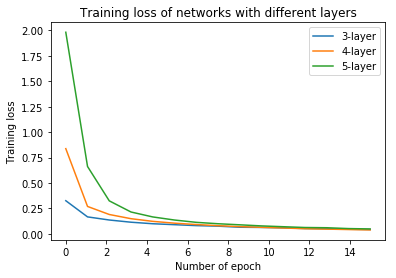

In [154]:
lossPlotMultiple(loss_epoch[:15], loss_epoch_4, loss_epoch_5)

In [75]:
# different activation functions
input_size = 784
#hidden_sizes = [128, 64]
hidden_sizes = [128]
output_size = 10

model4 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      #nn.ReLU(),
                      #nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model4)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax()
)


In [76]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model4.parameters(), lr = 0.03, momentum = 0.9)
time0 = time()
epochs = 15
loss_epoch_relu = []
loss_iteration_relu = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)#Flatten
        optimizer.zero_grad()
        output = model4(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_iteration_relu.append(loss.item())
        running_loss += loss.item()
    else:
        loss_epoch_relu.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
print("\nTraining Time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 0.33162626804017437
Epoch 1 - Training loss: 0.17666226269693167
Epoch 2 - Training loss: 0.13196585619691084
Epoch 3 - Training loss: 0.11455803106912275
Epoch 4 - Training loss: 0.10077549691901787
Epoch 5 - Training loss: 0.08863536350062685
Epoch 6 - Training loss: 0.0850458970631727
Epoch 7 - Training loss: 0.07411442799687282
Epoch 8 - Training loss: 0.0669834038417631
Epoch 9 - Training loss: 0.06415257057264276
Epoch 10 - Training loss: 0.05586622852224187
Epoch 11 - Training loss: 0.05536388413453011
Epoch 12 - Training loss: 0.05105931495789434
Epoch 13 - Training loss: 0.04685496173691124
Epoch 14 - Training loss: 0.04465461296187257

Training Time (in minutes) = 12.649419836203258


In [142]:
sum_loss = 0
count = 0
correct = 0
for images, labels in valloader:
    for i in range(len(images)):
        img = images[i].view(1, 784)
        #pro = classify(img)
        with torch.no_grad():
            logps = model4(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        count +=1
        if labels[i] == probab.index(max(probab)):
            correct += 1
print(correct / count) 

0.9672


In [78]:
# different activation functions
input_size = 784
#hidden_sizes = [128, 64]
hidden_sizes = [128]
output_size = 10

model5 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Tanh(),
                      nn.Linear(hidden_sizes[0], output_size),
                      #nn.ReLU(),
                      #nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model5)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Tanh()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax()
)


In [79]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model5.parameters(), lr = 0.03, momentum = 0.9)
time0 = time()
epochs = 15
loss_epoch_tanh = []
loss_iteration_tanh = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)#Flatten
        optimizer.zero_grad()
        output = model5(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_iteration_tanh.append(loss.item())
        running_loss += loss.item()
    else:
        loss_epoch_tanh.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
print("\nTraining Time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 0.323204039447089
Epoch 1 - Training loss: 0.1655254404006927
Epoch 2 - Training loss: 0.13472214901347213
Epoch 3 - Training loss: 0.11904712986034244
Epoch 4 - Training loss: 0.09949454250904337
Epoch 5 - Training loss: 0.09467568938513157
Epoch 6 - Training loss: 0.08626318062399464
Epoch 7 - Training loss: 0.07956046544870278
Epoch 8 - Training loss: 0.07799603884318855
Epoch 9 - Training loss: 0.0704633465770489
Epoch 10 - Training loss: 0.06735894644954629
Epoch 11 - Training loss: 0.06473026623446018
Epoch 12 - Training loss: 0.058411779042992634
Epoch 13 - Training loss: 0.053463623636086456
Epoch 14 - Training loss: 0.051101173369163304

Training Time (in minutes) = 6.724453496932983


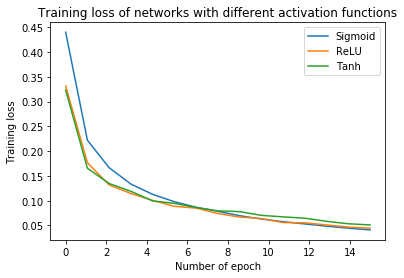

In [87]:
lossPlotMultiple(loss_epoch[:15], loss_epoch_relu, loss_epoch_tanh)

In [143]:
sum_loss = 0
count = 0
correct = 0
for images, labels in valloader:
    for i in range(len(images)):
        img = images[i].view(1, 784)
        #pro = classify(img)
        with torch.no_grad():
            logps = model5(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        count +=1
        if labels[i] == probab.index(max(probab)):
            correct += 1
print(correct / count) 

0.9723
